In [2]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rad = 5 #radius for halfmoon data
d = 0 # Halfmoon data paramenter
samp_tr = 1000 # number of training samples
samp_te = 2000 # number of testing samples
width = 3 # width for halfmoon daata
epochs = 100 # number of epochs 

In [4]:
#function for generating halfmoon datapoints 
def datagen(rad, d, samp, width):
  if rad < width / 2:
    print('The radius should be at least larger than half the width')
  if samp % 2 != 0 :
    print('Please make sure the number of samples is even')           
  
  a = np.random.rand(2,(int)(samp / 2))
  radius = (rad - width / 2) + width * a[0,:]
  temp_t = 3.14 * a[1,:]
  thita = np.reshape(temp_t, (1, np.product(temp_t.shape)))        

  x  = radius * np.cos(thita)
  x1  = radius * np.cos(-thita) + rad

  y  = radius * np.sin(thita)
  y1  = radius * np.sin(-thita) - d
  
  l = 1 * np.ones([1, x.size])     
  l1 = 0 * np.ones([1, x.size])        

  d1 = np.vstack((np.hstack((x,x1)),np.hstack((y,y1))))
  d2 = np.hstack((l,l1))
  data = np.concatenate((d1,d2),axis=0)
  
  row = data.shape[0]
  col = data.shape[1]
  
  shuffle_seq = np.random.permutation(col)
  data_shuffled = np. random.rand(3,samp)

  for i in range(col):
    data_shuffled[:,i] = data[:,shuffle_seq[i]]
  return data_shuffled


<function matplotlib.pyplot.show(close=None, block=None)>

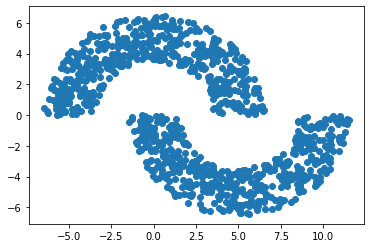

In [5]:
class perceptron():
  def __init__(self):
    np.random.seed(69)
    self.weights = 2 * np.random.random((2,1)) - 1
  
  def train_perceptron(self, inputs, results, epoch): # training perceptron
    for i in range(epoch):
      output = self.preditct(inputs)
      error = results - output
      n_weight = np.dot(inputs.T, 1 * error * self.deriv_activation(output))
      self.weights += n_weight

  def activation(self, x): # activation function
    a = 1/(1+np.exp(-x))
    a[a >= 0.5] = 1
    a[a < 0.5] = 0
    return a
    
  def deriv_activation(self,x):
    return (x * (1-x))
            
  def preditct(self,inputs):
    output = self.activation(np.dot(inputs.astype(float), self.weights))
    return output
    
  def accuracy(self,oglLabel,prediction):
    matched = 0
    for i in range(len(oglLabel)):
      if oglLabel[i] == prediction[i]:
        matched += 1
    accuracy = matched / float(len(oglLabel)) * 100.0       
    return accuracy

fdata_tr = datagen(rad, d, samp_tr, width)
xtrain = np.stack([fdata_tr[0], fdata_tr[1]], axis=1)
plt.scatter(xtrain[0:,0], xtrain[0:,1])
plt.show


Training perceptron...
Training Completed


<function matplotlib.pyplot.show(close=None, block=None)>

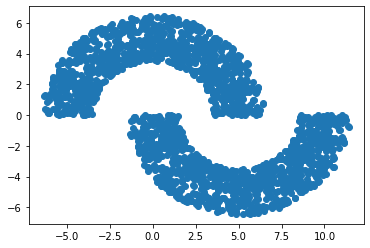

In [6]:
print("Training perceptron...")
sp = perceptron()
ytrain = fdata_tr[2].reshape(samp_tr,1)
sp.train_perceptron(xtrain,ytrain,epochs)
print("Training Completed")

#generating halfmoon testing samples
fdata_te = datagen(rad, d, samp_te, width)
xtest = np.stack([fdata_te[0], fdata_te[1]], axis=1)

plt.scatter(xtest[0:,0], xtest[0:,1])
plt.show


In [7]:
pred = sp.preditct(xtest)
ytest = fdata_te[2].reshape(samp_te,1)
error = np.square(np.subtract(ytest,pred)).mean()
print("Halfmoon data error percentage :",error*100,"%")

Halfmoon data error percentage : 10.100000000000001 %
